<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/XGBoost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv('/content/adult.csv')

In [ ]:
# Separate features and target variable
features = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'] # Only drop categorical features
x = data.drop(features, axis=1)
y = data['Above/Below 50k']


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# preprocessing
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = x_train.select_dtypes(include=['number']).columns

# Fit and transform on numerical features only
x_train_transformed = scaler.fit_transform(x_train[numerical_features])
x_test_transformed = scaler.transform(x_test[numerical_features])

# Apply SMOTE for oversampling
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_transformed, y_train)

# Apply Label Encoding to the target variable
le = LabelEncoder()
y_train_resampled = le.fit_transform(y_train_resampled)
y_test_transformed = le.transform(y_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4,],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the resampled training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_hat_xgb = best_model.predict(x_test_transformed)

# Evaluate the model
acc = accuracy_score(y_test_transformed, y_hat_xgb)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test_transformed, y_hat_xgb)
print(report)

print("Best parameters found: ", grid_search.best_params_)

Model accuracy was 81.01%
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4908
           1       0.60      0.70      0.64      1605

    accuracy                           0.81      6513
   macro avg       0.75      0.77      0.76      6513
weighted avg       0.82      0.81      0.81      6513

Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.9}


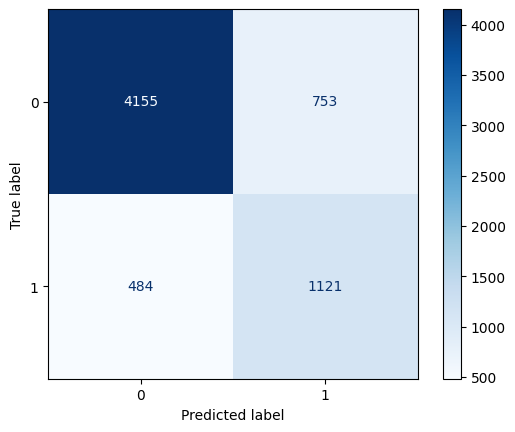

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_transformed, y_hat_xgb, cmap=plt.cm.Blues) # Use the transformed y_test (y_test_transformed) that has been label encoded
plt.show()